
# Customer Churn Prediction using PyTorch

## Project Description:

In this project, you developed a Customer Churn Prediction model using machine learning and deep learning techniques with PyTorch. The primary objective of this project was to predict customer churn based on historical customer data, helping businesses identify customers who are likely to stop using the service. By implementing data preprocessing, model training, and evaluation, you successfully created a pipeline to predict customer churn.

### Key Steps Involved:

**Data Preprocessing:**
- Handled missing values, encoded categorical variables (both binary and multi-class), and performed feature scaling on numeric data (e.g., MonthlyCharges, TotalCharges, tenure).
- Converted the dataset into a suitable format for machine learning models and split it into training and testing sets.

**Exploratory Data Analysis (EDA):**
- Visualized important features such as the distribution of churn, correlation between variables, and key indicators like tenure, MonthlyCharges, and TotalCharges.

**Model Development:**
- Defined and built a neural network model using PyTorch. The architecture included multiple fully connected layers with Batch Normalization and Dropout to prevent overfitting.
- Used the Adam optimizer to minimize the cross-entropy loss during training.

**Model Evaluation:**
- Evaluated the model using metrics such as accuracy, classification report, and confusion matrix to understand the model's performance in predicting customer churn.

### Outcomes Achieved:

**Prediction Accuracy:**
- The model achieved a reasonable level of accuracy, demonstrating its capability to predict churners effectively. The confusion matrix provided insights into the model's performance on both positive and negative churn cases.

**Performance Insights:**
- The classification report detailed important metrics such as precision, recall, and F1-score, which are essential for understanding the model's strengths and weaknesses, especially for imbalanced datasets (since churn prediction typically involves class imbalance).

## Skills Gained:

- **Data Preprocessing Techniques:** You learned how to handle missing data, apply label encoding for categorical variables, and standardize numerical features to make the dataset ready for machine learning models.
- **Model Building in PyTorch:** You gained experience in building a neural network using PyTorch, including defining layers, applying activation functions, and using optimization techniques like Adam.
- **Model Evaluation and Interpretation:** You learned how to interpret key evaluation metrics like accuracy, precision, recall, and how to visualize a confusion matrix to assess model performance.
- **Handling Imbalanced Datasets:** You worked with an imbalanced dataset and learned how to analyze the model's performance using classification metrics beyond accuracy (e.g., recall and F1-score), which are more critical for imbalanced classification problems like churn prediction.

### Summary:

This project provided you with hands-on experience in building a complete machine learning pipeline, starting from data preprocessing to model evaluation. You gained valuable skills in deep learning using PyTorch, exploratory data analysis, and performance evaluation. These skills are critical for applying machine learning in real-world business scenarios, particularly in customer analytics and predictive modeling.


Epoch [1/10], Loss: 0.5413
Epoch [2/10], Loss: 0.4727
Epoch [3/10], Loss: 0.4557
Epoch [4/10], Loss: 0.4617
Epoch [5/10], Loss: 0.4460
Epoch [6/10], Loss: 0.4355
Epoch [7/10], Loss: 0.4398
Epoch [8/10], Loss: 0.4322
Epoch [9/10], Loss: 0.4408
Epoch [10/10], Loss: 0.4317


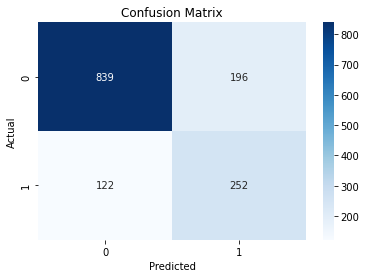


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1035
           1       0.56      0.67      0.61       374

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.77      0.78      1409

Accuracy: 0.7743


In [3]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop(['customerID'], axis=1, inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Churn')
le = LabelEncoder()
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=[col for col in cat_cols if col not in binary_cols])
df['Churn'] = le.fit_transform(df['Churn'])

# Feature Scaling
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert data to tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.longlong))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.longlong))

# DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the PyTorch Model
class ChurnNet(nn.Module):
    def __init__(self, input_size):
        super(ChurnNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc3(x)
        return x

# Model initialization
input_size = X_train_tensor.shape[1]
model = ChurnNet(input_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Model Training
num_epochs = 10
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# Model Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred = y_pred.numpy()
    y_true = y_test_tensor.numpy()

# Evaluation Metrics
classification_rep = classification_report(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

# Visualizing Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report and accuracy
print("\nClassification Report:")
print(classification_rep)

print(f"Accuracy: {accuracy:.4f}")



## Skills Learned:

- Data Preprocessing Techniques: Handled missing data, label encoding, feature scaling, and dataset splitting.
- Building Neural Networks in PyTorch: Built a custom neural network architecture, including defining layers, batch normalization, and dropout.
- Model Training and Evaluation: Gained hands-on experience in model training, validation, and evaluation with key metrics like accuracy, classification report, and confusion matrix.
- Handling Imbalanced Datasets: Understood the impact of imbalanced datasets and the importance of metrics like precision, recall, and F1-score in such scenarios.
